<a href="https://colab.research.google.com/github/mrpiay/mrbeam/blob/main/mrbeam_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Step #1: install mrbeam framework**

In [ ]:
! git clone https://github.com/mrpiay/mrbeam.git

In [ ]:
! wget https://github.com/liamedeiros/ehtplot/archive/refs/heads/master.zip
! unzip master.zip -d .
! wget https://github.com/achael/eht-imaging/archive/refs/tags/v1.2.7.zip
! unzip v1.2.7.zip -d .
! pip install pygmo
! pip install ./ehtplot-master
! pip install ./eht-imaging-1.2.7
! pip install ./mrbeam/mr_beam/itreg
! pip install ./mrbeam/mr_beam/libwise-0.4.7-light
! pip install ./mrbeam/mr_beam/MSI
! pip install ./mrbeam/mr_beam/imagingbase
! pip install ./mrbeam/mr_beam/ga

# **Step #2: restart session (Runtime -> Restart session (Ctrl+M) )**





# **Step #3: example**

In [25]:
import pygmo as pg
import numpy as np
import GA.solver as solver
from GA.problems import EHT
import sys
import ehtim as eh
import matplotlib.pyplot as plt

#mrpiay
import json
import pprint
#mrpiay

In [ ]:
#mrpiay config_file = './mrbeam/mr_beam/mrpiay/ring_16_first_test.config'
outfile = './mrbeam/mr_beam/mrpiay/logger.log'

#mrpiay
config_file = './mrbeam/mr_beam/mrpiay/ring_16_first_test.config.json'
#mrpiay

In [82]:
#-------------------------------------------------------------------------------
# Fixed imaging parameters. WE WON'T USE THEM FOR NOW
#-------------------------------------------------------------------------------
ttype     = 'direct'            # Type of Fourier transform ('direct', 'nfft', or 'fast')

zbl       = 3                 # Total compact flux density (Jy)
npix      = 16                # Number of pixels across the reconstructed image
fov       = 160*eh.RADPERUAS    # Field of view of the reconstructed image

prior_fwhm = 40.0*eh.RADPERUAS  # Gaussian prior FWHM (radians)
sys_noise  = 0.02               # fractional systematic noise
                                # added to complex visibilities

#data weights
data_term = {'amp'    : 1.0,    # visibility amplitudes
             'cphase' : 1.0,    # closure phases
             'logcamp': 1.0}    # log closure amplitudes

stop      = 1e-4                # Imager stopping criterion
gain_tol  = [0.02,0.2,0.2]          # Asymmetric gain tolerance for self-cal; we expect larger values
                                # for unaccounted sensitivity loss
                                # than for unaccounted sensitivity improvement
uv_zblcut = 0.1e9               # uv-distance that separates the inter-site "zero"-baselines
                                # from intra-site baselines
zero_baseline = ['ALMA', 'APEX']    # baseline to measure zero-spacing flux
#rescaling = 0.04              # rescale intensities per pixel to obtain values of the order ~1

cbar_lims = [0, 1.6*10**11]       #cbar-lims for interactive plotting (brightness temperature)

In [ ]:
# Way of reading the config_file... if json is done, don't needed

# IMPORTANT!: Remember to change the path of img and uvf in your config

#mrpiay config = solver.read_config_params(config_file, 'EHT')

#mrpiay
def create_config_json():
  print(json.dumps(config, indent = 4))
#create_config_json()
#mrpiay

Loading uvfits:  /content/mrbeam/mr_beam/mrpiay/ring_16.uvfits
no IF in uvfits header!
POLREP_UVFITS: circ
Number of uvfits Correlation Products: 4
No NX table in uvfits!
Loading fits image:  /content/mrbeam/mr_beam/mrpiay/ring_16.fits

config:

{
    "reg_term": {
        "l1w": 1.0,
        "simple": 0.1,
        "tv": 10.0,
        "tv2": 10.0,
        "lA": 10.0,
        "flux": 10000.0
    },
    "data_term": {
        "vis": 1.0,
        "amp": 0.0,
        "cphase": 0.0,
        "logcamp": 0.0
    },
    "img": "/content/mrbeam/mr_beam/mrpiay/ring_16.fits",
    "uvf": "/content/mrbeam/mr_beam/mrpiay/ring_16.uvfits",
    "rescaling": 0.02,
    "zbl": 0.6,
    "grid_size": 7,
    "seed_initial": 12,
    "prior_fwhm": 100.0,
    "num_cores": 64,
    "generations": 10,
    "neighbours": 6,
    "decomposition_method": "grid",
    "decomposition_seed": 12,
    "CR": 1.0,
    "F": 0.5,
    "eta_m": 20.0,
    "realb": 0.9,
    "limit": 2,
    "preserve_diversity": true,
    "pop_size": 

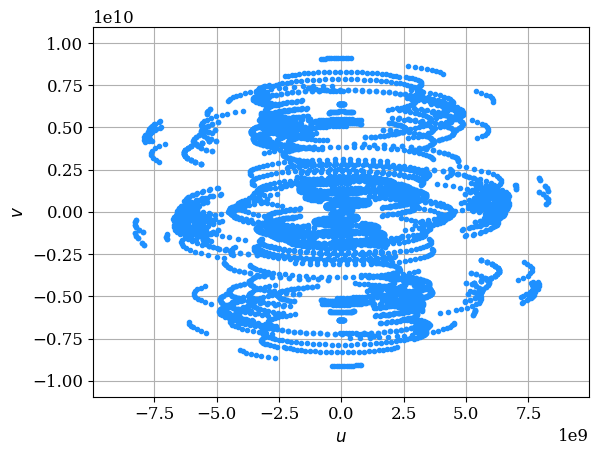

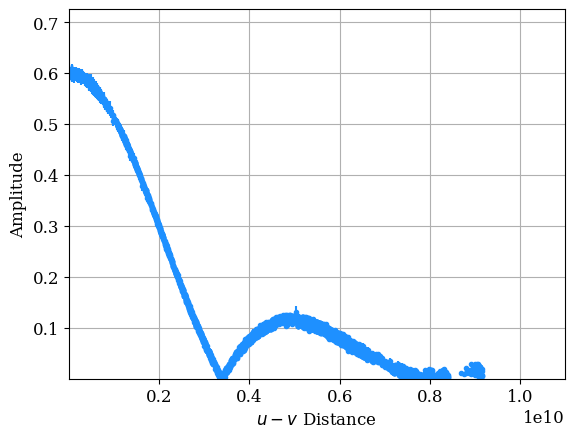


obs.cleanbeam


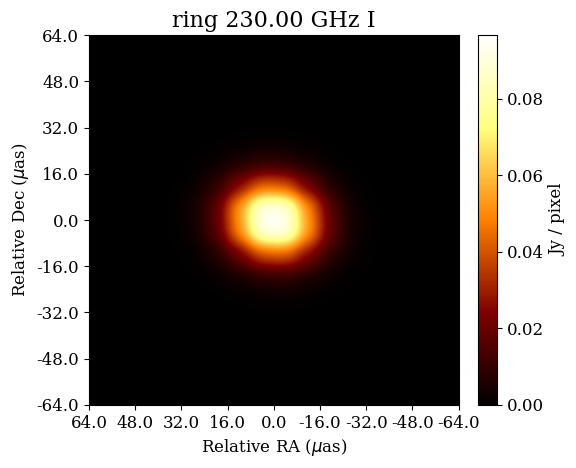


obs.dirtybeam


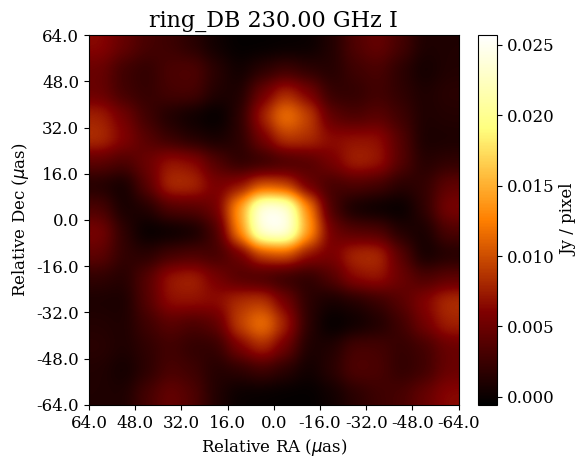


obs.dirtyimage


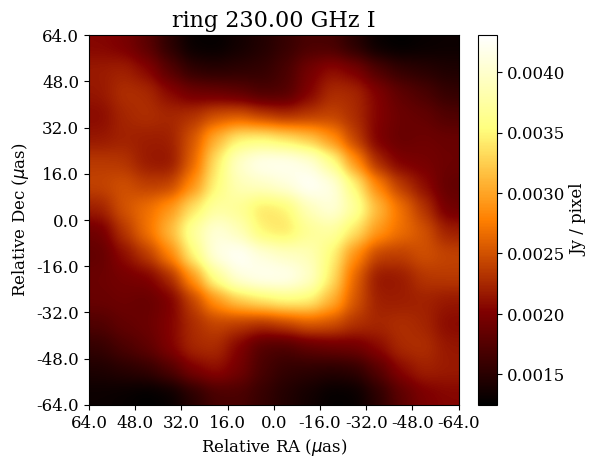


prior:

{'_imdict': {'I': array([3.56458389e-04, 2.93565833e-04, 2.34231188e-04, 1.82766411e-04,
       1.42569202e-04, 1.14864899e-04, 9.71208780e-05, 8.33867359e-05,
       6.79312133e-05, 4.93870076e-05, 3.09384650e-05, 1.65481723e-05,
       7.67166836e-06, 3.21374079e-06, 1.29922776e-06, 5.40044042e-07,
       2.93565833e-04, 2.42999714e-04, 1.98333574e-04, 1.67445201e-04,
       1.58783121e-04, 1.75216612e-04, 2.05687196e-04, 2.25625414e-04,
       2.12910494e-04, 1.66417585e-04, 1.06172170e-04, 5.51083760e-05,
       2.33985858e-05, 8.28057191e-06, 2.55836904e-06, 7.59594030e-07,
       2.34231188e-04, 1.98333574e-04, 1.77885007e-04, 1.94820035e-04,
       2.76316228e-04, 4.31390878e-04, 6.18767168e-04, 7.47700830e-04,
       7.37605260e-04, 5.87587333e-04, 3.76570005e-04, 1.93999103e-04,
       8.04478870e-05, 2.69840647e-05, 7.42458988e-06, 1.74479255e-06,
       1.82766411e-04, 1.67445201e-04, 1.94820035e-04, 3.26646468e-04,
       6.42428355e-04, 1.16839390e-03, 1.77975863e

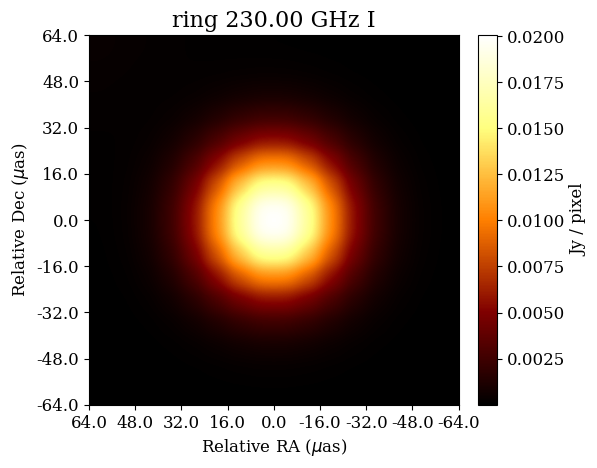


true_img:

{'_imdict': {'I': array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.71237867e-15,
       1.11518846e-12, 1.21742731e-10, 1.46710065e-09, 5.54145513e-09,
       5.54145513e-09, 1.46710065e-09, 1.21742731e-10, 1.11518846e-12,
       2.71237867e-15, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.71237867e-15, 1.11518846e-12, 1.22857920e-10,
       1.92560790e-09, 5.55957112e-08, 6.08737740e-07, 2.27994580e-06,
       2.27994580e-06, 6.08737740e-07, 5.55957112e-08, 1.92560790e-09,
       1.22857920e-10, 1.11518846e-12, 2.71237867e-15, 0.00000000e+00,
       0.00000000e+00, 1.11518846e-12, 4.58507257e-10, 5.01759961e-08,
       6.53249423e-07, 7.74267350e-06, 6.81283377e-05, 2.49376590e-04,
       2.49376590e-04, 6.81283377e-05, 7.74267350e-06, 6.53249423e-07,
       5.01759961e-08, 4.58507257e-10, 1.11518846e-12, 0.00000000e+00,
       2.71237867e-15, 1.22857920e-10, 5.01759961e-08, 5.46724962e-06,
       6.64582589e-05, 3.14578526e-04, 1.042316

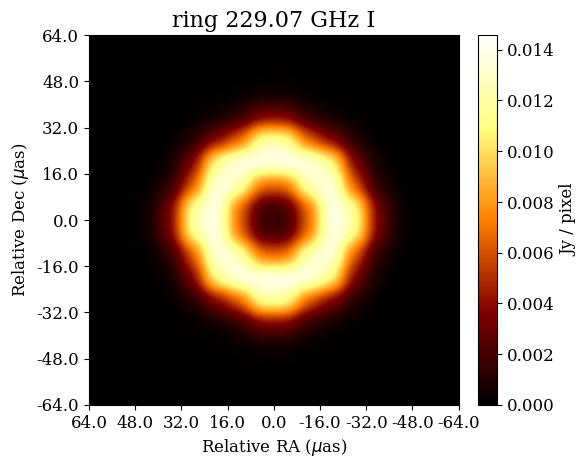

Generating I image...
Initial S_1: -0.000000 S_2: 0.000000 S_3: 0.000000
Initial Chi^2_1: 1793.549305 Chi^2_2: 1.000000 Chi^2_3: 1.000000
Initial Objective Function: 89627.483246
Total Data 1:  3592
Total Pixel #:  256
Clipped Pixel #:  256

time: 0.483714 s
J: -24.608245
Final Chi^2_1: 0.503399 Chi^2_2: 1.000000  Chi^2_3: 1.000000
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT


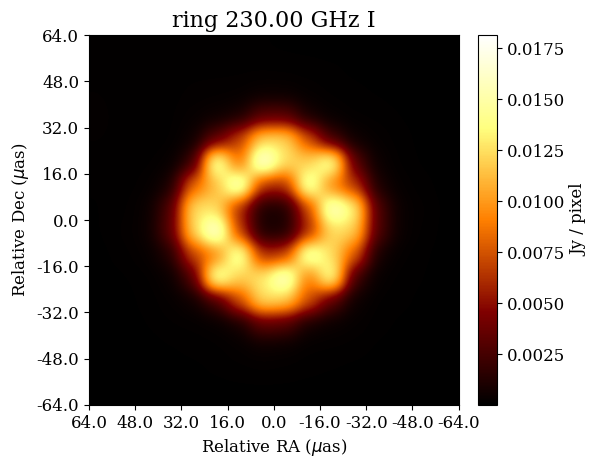

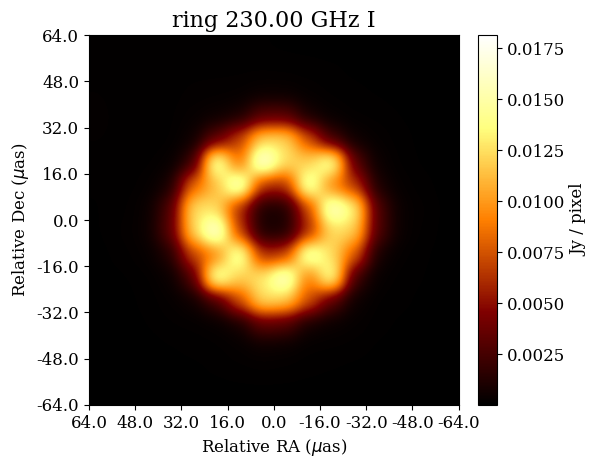

In [121]:
# Prior definition for the entropy regularizer

#mrpiay obs = eh.obsdata.load_uvfits(config['uvf'])

#mrpiay
with open(config_file) as f:
    config = json.load(f)
#mrpiay

obs = eh.obsdata.load_uvfits(config['uvf'])
true_img = eh.image.load_fits(config['img'])
obs_sc = obs.copy()

#mrpiay
fov = 128*eh.RADPERUAS
#mrpiay

prior = eh.image.make_square(obs_sc, npix, fov) #prior image, make a prior image
prior = prior.add_gauss(zbl, (prior_fwhm, prior_fwhm, 0, 0, 0))
prior = prior.add_gauss(1e-2*zbl, (100*eh.RADPERUAS, 100*eh.RADPERUAS, 0, 100*eh.RADPERUAS, 100*eh.RADPERUAS))

#mrpiay

print('\nconfig:\n')
print(json.dumps(config, indent=4))

print('\nobs:\n')
print(vars(obs))
obs.plotall('u', 'v', conj=True)
obs.plotall('uvdist', 'amp')

print('\nobs.cleanbeam')
cbeam = obs.cleanbeam(npix,fov)
cbeam.display()

print('\nobs.dirtybeam')
dbeam = obs.dirtybeam(npix, fov)
dbeam.display()

print('\nobs.dirtyimage')
dim = obs.dirtyimage(npix, fov)
dim.display()

print('\nprior:\n')
print(vars(prior))
prior.display()

print('\ntrue_img:\n')
print(vars(true_img))
true_img.display()

out = eh.imager_func(obs, prior, prior, zbl, d1="vis", alpha_d1=50, s1="gs",maxit=100, show_updates=False)
out.display()
#mrpiay

In [122]:
# Getting the inputs

reg_term = config['reg_term']
data_term = config['data_term']
rescaling = config['rescaling']
zbl = config['zbl']

In [123]:
# Now, we create the MOP

EHTfit = EHT.EHT(obs, prior, data_term, reg_term, rescaling, zbl, npix**2)
EHTfit.setFit()

udp = pg.problem(EHTfit)

Generating I image...
Generating I image...
Generating I image...
Generating I image...
Generating I image...
Generating I image...
Generating I image...


In [126]:
#mrpiay
print('EHT:')
pprint(vars(EHTfit))
print('\nEHT.fit:')
pprint(vars(EHTfit.fit))
print('\nUDP:')
print(udp)
#for i in list(vars(EHTfit.fit).keys()):
#  if 'fid' in i:
#    pprint(vars(getattr(EHTfit.fit, i)))
#mrpiay

EHT:
{'data_term': {'amp': 0.0, 'cphase': 0.0, 'logcamp': 0.0, 'vis': 1.0},
 'dim': 256,
 'fit': <GA.problems.EHT.MyFunc object at 0x7880e96cb670>,
 'mode': 'pareto',
 'num_cores': 16,
 'obs': <ehtim.obsdata.Obsdata object at 0x7880e90f5120>,
 'prior': <ehtim.image.Image object at 0x7880e96c8d30>,
 'reg_term': {'flux': 10000.0,
              'l1w': 1.0,
              'lA': 10.0,
              'simple': 0.1,
              'tv': 10.0,
              'tv2': 10.0},
 'rescaling': 0.02,
 'zbl': 0.6}

EHT.fit:
{'data_fidelity_term': <regpy.functionals.Composed object at 0x7880e95ddbd0>,
 'func_amp': <imagingbase.ehtim_wrapper.EmptyFunctional object at 0x7880e95dfa90>,
 'func_cph': <imagingbase.ehtim_wrapper.EmptyFunctional object at 0x7880e95dee90>,
 'func_flux': <imagingbase.ehtim_wrapper.EhtimFunctional object at 0x7880ed47e590>,
 'func_l1': <imagingbase.ehtim_wrapper.EhtimFunctional object at 0x7880ed47e260>,
 'func_l2': <imagingbase.ehtim_wrapper.EhtimFunctional object at 0x7880ed47e650>,


In [105]:
# Defining MOEA/D

def calculate_pop_size(grid_size):
    x = np.arange(grid_size+1)
    return int(np.sum(np.sum(np.meshgrid(x, x, x, x, x, x, x, x), axis=0) == grid_size))
pop_size = 84 #mrpiay 924 #config['grid_size'] If you have supercomputer, use the config, otherwise use this
seed = config['seed_initial']
pop = pg.population(udp, size=pop_size, seed=seed)


weights = pg.decomposition_weights(n_f=udp.get_nf(), n_w=len(pop), method=config['decomposition_method'], seed=config['decomposition_seed'])

gen = config['generations']
neighbours = config['neighbours']

algo = pg.algorithm(pg.moead(gen=gen, neighbours=neighbours, decomposition="weighted", weight_generation=config["decomposition_method"], seed=config['decomposition_seed']))

algo.set_verbosity(1)

maxit = 10 #100
stop = 1e-4
uv_zblcut2 = 0.1*10**9
res = obs_sc.res()

# This is for chosing a good starting point for the opti problem. Try both options and check difference
for i in range(len(pop)):
    pop.set_x(i, np.concatenate([obs.dirtyimage(true_img.xdim, true_img.fovx()).imvec/rescaling])) #dirty image as starting point
    # pop.set_x(i, np.concatenate([prior.imvec/rescaling])) # Gaussian

In [106]:
# Et voilà! evolve and getting the sol

pop = algo.evolve(pop)

fits, vectors = pop.get_f(), pop.get_x()

<ipython-input-107-ca06dc8751a6>:6: DeprecationWarning: This function is deprecated. Please call randint(1, 83 + 1) instead
  randsel = [np.random.random_integers(1, len(vectors)-1) for i in range(10)]


Loading fits image:  ./mrbeam/mr_beam/mrpiay/ring_16.fits


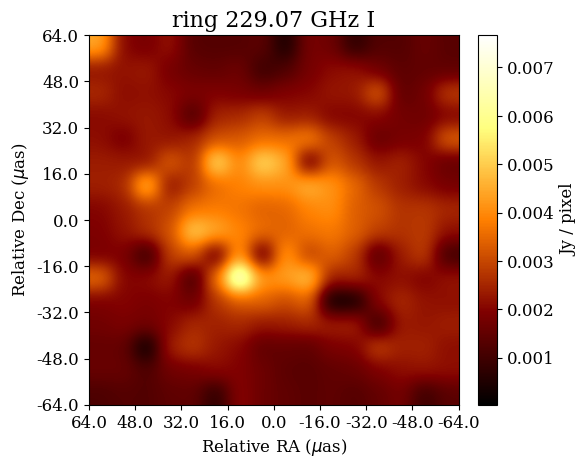

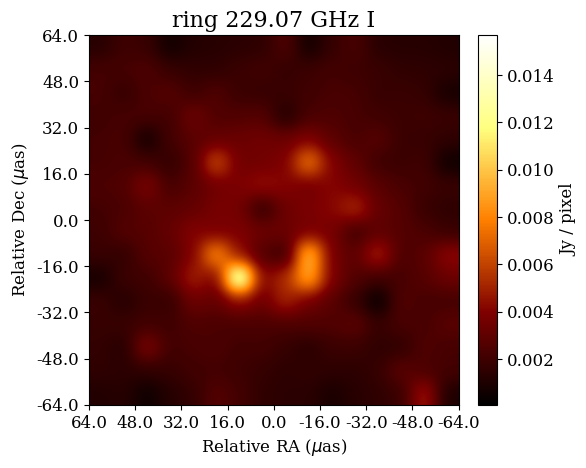

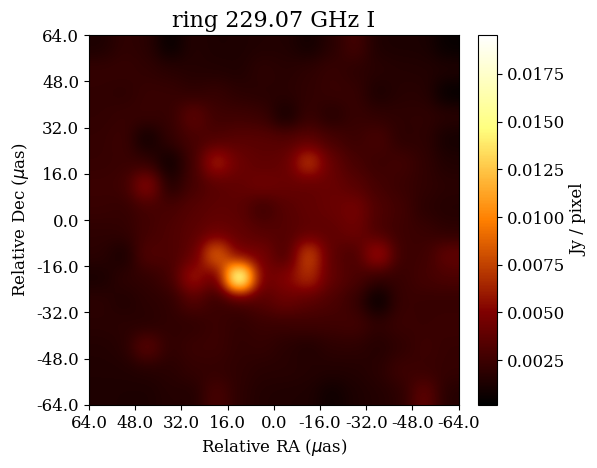

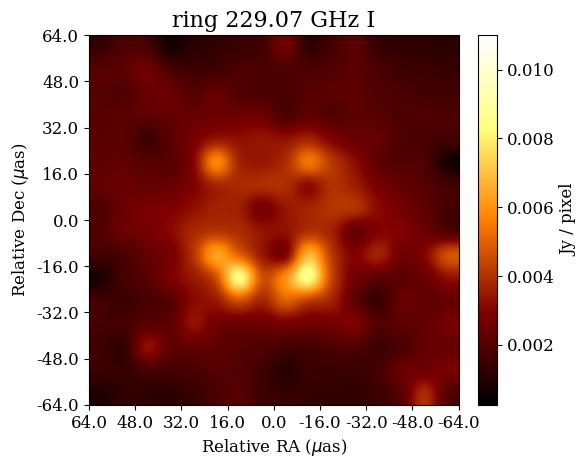

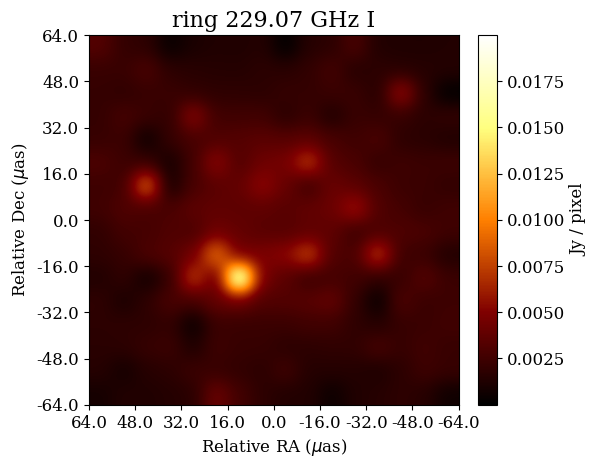

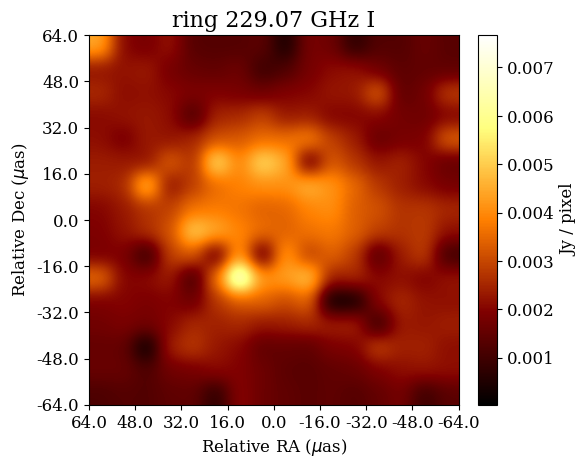

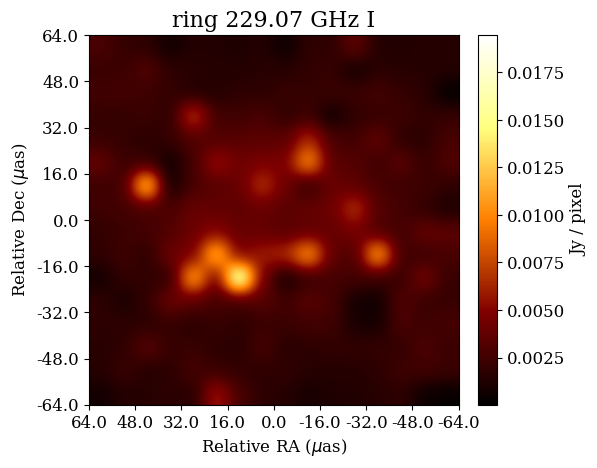

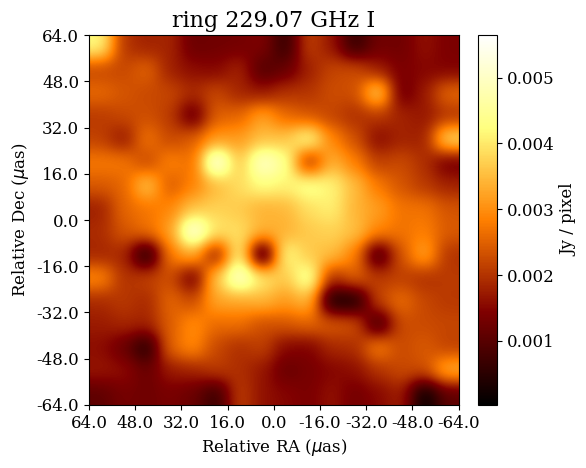

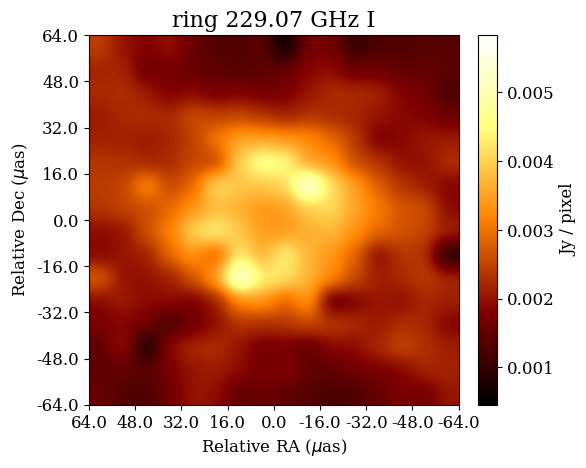

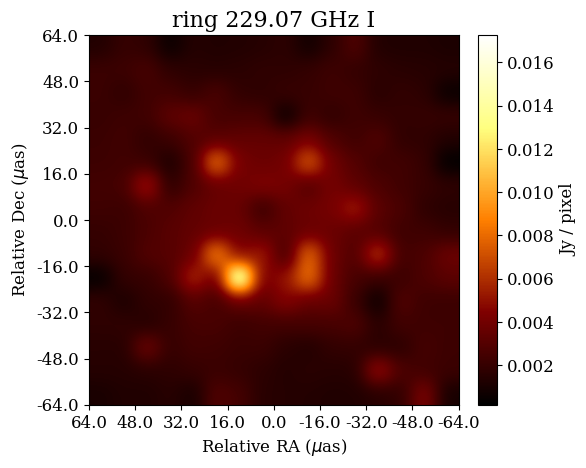

In [107]:
# And print some random solutions

save = False

#mrpiay randsel = [np.random.random_integers(1, len(vectors)-1) for i in range(100)]
randsel = [np.random.random_integers(1, len(vectors)-1) for i in range(10)]
im=eh.image.load_fits('./mrbeam/mr_beam/mrpiay/ring_16.fits')
#im=eh.image.load_fits('synthetic_data/models/ring_16.fits')
for i in randsel:
   im.imvec = vectors[i]*rescaling
   im.display() #for saving im.display(export_pdf='path/name.png/pdf')
if save:
   import os
   os.system('rm %s_vectors*' % outfile)
   np.savetxt(outfile+'_fits.npy',fits)
   np.savetxt(outfile+'_vectors.npy',vectors)
   np.savetxt(outfile+'_weights.npy',weights)